# Satellite Image Classification using Neural Network <br>

### Muzammil Mushtaq


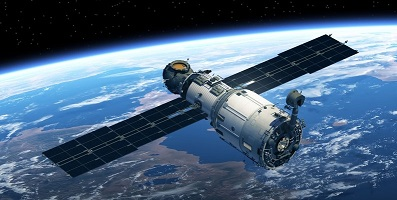

# Task 1

## Story

### Context

Satellite image Classification Dataset-RSI-CB256 , This dataset has 4 different classes mixed from Sensors and google map snapshot.

### Content

> Over the years, significant advancements have been made in the field of remote sensing (RS) image interpretation and its extensive applications. As RS images have become increasingly accessible, there is a growing need for automatic interpretation of these images. Consequently, benchmark datasets play a vital role as fundamental requirements for the development and evaluation of intelligent interpretation algorithms. 

>This project examines the existing benchmark datasets within the research community of RS image interpretation and addresses the challenge of efficiently creating a suitable benchmark dataset for RS image interpretation.


# Task 2

## The Data

    1) Data source

    2) First sight of dataset 


### Data Source

Following Database has been extracted from the Kaggle website (https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification)



### First sight of Dataset

In [1]:
project_name='Satellite_Image_Classification_DL_Project'

In [2]:
import os
import tarfile
import zipfile

In [3]:
'''                                   Extract images from archive and copy it to data folder
'''

with zipfile.ZipFile('archive.zip', 'r') as zip_file:
    zip_file.extractall(path='./data')

In [4]:
'''                                   Checking the data directories
'''

data_dir = './data/data'
print('Folders in the data directory are : ','\n','\n', os.listdir(data_dir))

Folders in the data directory are :  
 
 ['cloudy', 'desert', 'green_area', 'water']


> The folders in the Data directory have identical names to the images they contain.

> The above directory structure (one folder per class) is used by many computer vision datasets, and most deep learning libraries provide utilites for working with such datasets. We can use the ImageFolder class from torchvision to load the data as PyTorch tensors.

In [5]:
'''                                    Check the number of images in particular folder
'''

Folders = {0:'cloudy',1:'desert' ,2:'green_area',3:'water'}

for i in range(0,len(Folders)):
    files = os.listdir(data_dir+'/'+Folders[i])
    print ('No. of Images data of '+Folders[i]+' is: ', len(files))

No. of Images data of cloudy is:  1500
No. of Images data of desert is:  1131
No. of Images data of green_area is:  1500
No. of Images data of water is:  1500


> Here the image dataset is balance in a way that the numbers of images in each folder are equal except for the desert.

> It is required for the Deep Learning (Neural Network) that the data should not unequal in amount that would eventually effect our final predictions

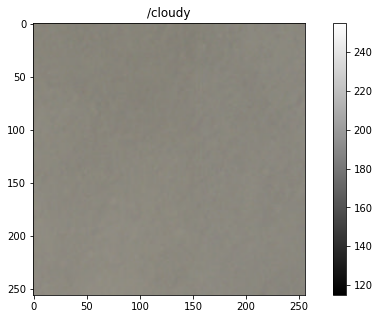

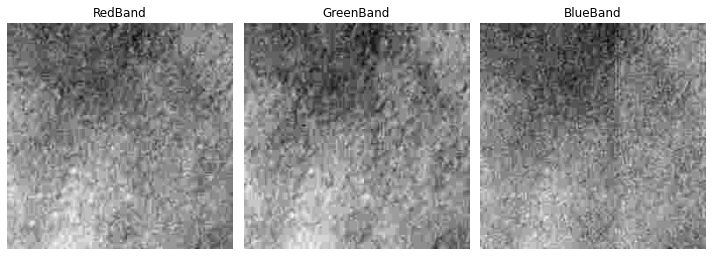

****************************************************************************************************


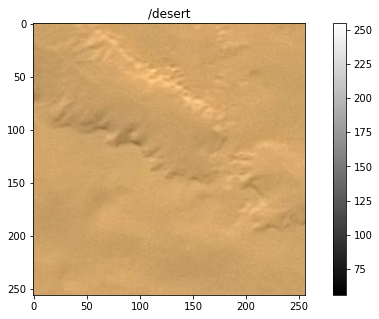

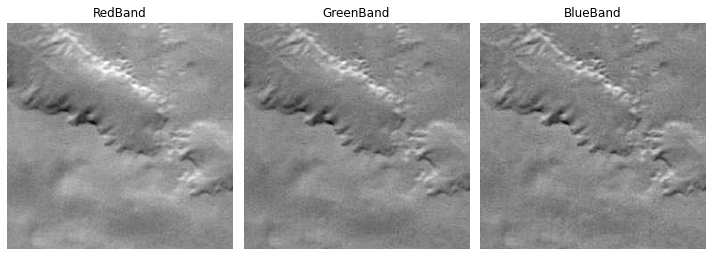

****************************************************************************************************


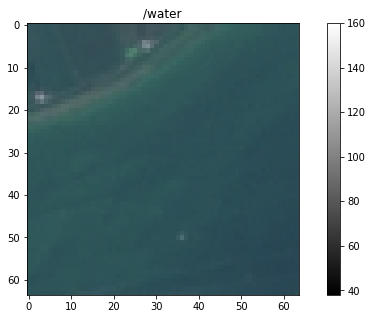

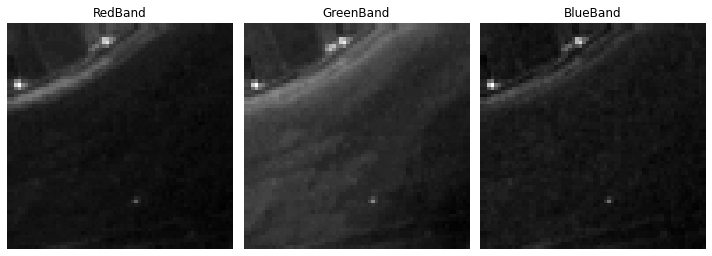

****************************************************************************************************


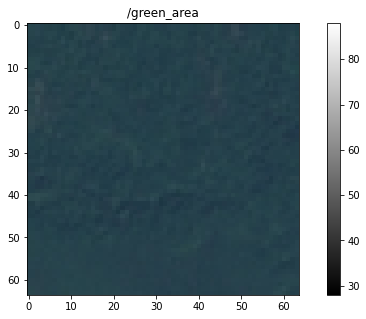

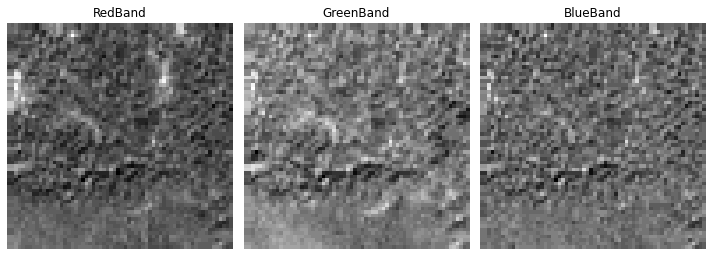

****************************************************************************************************


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

def jpg_to_plt(folder):
    plt.figure(figsize=(10, 5))
    
    '''                                Choose random image from each categories
    '''
    im1 = random.choice(os.listdir(data_dir+folder))
    
    '''                                Read and Plot jpg images to matplotlib
    '''
    img = mpimg.imread(data_dir+folder+'/'+im1)
    cax1 = plt.imshow(img, cmap='gray')
    plt.title(folder)
    plt.colorbar(cax1)
    
    '''                                Plot Red, Blue, Green bands of each categories 
    '''
    plt.figure(figsize=(10, 5))
    bands = ['Red','Green','Blue']
    for i in range(0,3,1):        
        band = img[:, :, i]  
        plt.subplot(130+i+1)
        plt.imshow(band, cmap='gray')
        plt.title(bands[i]+'Band')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    print (100*'*')   
    #************************************************
    
jpg_to_plt('/cloudy')
jpg_to_plt('/desert')
jpg_to_plt('/water')
jpg_to_plt('/green_area')


### Analysis of fist sight of dataset

> I have the 4 categories of data images saved in the one folder per class. Each class has 1500 images except the desert (1131).

> I randomly select one image from each class and plot. First sight of images show that desert and cloud images are 256 by 256 size and rest are 64 by 64 size. 

> Some of the images are quite understandable through its features, however some are hard to detect.

> Pixel values are from 0-255 although cloud and desert have high pixel values as compared to water and green_area. Images are subdivided into 3 bands (Red, Green, Blue).

# Task 3

## Initial Data Analysis

    1) Average distribution of pixel values of each class and their three bands (RGB)
    
 

In [7]:
def descriptive_stats(folder):
    
    '''                                Path of all the data images
    '''
    im1 = os.listdir(data_dir+folder)

    avg_class, count = 0, 0  # Sum and count of each image
    for i in range(len(im1)):  # run through the total number of images in the folder
        count += 1
        img = mpimg.imread(data_dir+folder+'/'+im1[i])
        avg_class += img
    
    '''                         Calculate the average of all the images per class along 
                                the average of their color bands normalized by 255
    '''
    
    print ('Average pixel values of all the images of ',folder[1:],' is = ',np.round(np.mean(avg_class[:,:,0:3]/255),4),'+/-',np.round(np.std(avg_class[:,:,0:3]/255),4),'\n')
    print ('Average pixel values of the Red band ',folder[1:],' is = ',np.round(np.mean(avg_class[:,:,0]/255),4),'+/-',np.round(np.std(avg_class[:,:,0]/255),4),'\n')  # Red
    print ('Average pixel values of the Green band ',folder[1:],' is = ',np.round(np.mean(avg_class[:,:,1]/255),4),'+/-',np.round(np.std(avg_class[:,:,1]/255),4),'\n')  # green
    print ('Average pixel values of the Blue band ',folder[1:],' is = ',np.round(np.mean(avg_class[:,:,2]/255),4),'+/-',np.round(np.std(avg_class[:,:,2]/255),4),'\n')  # blue

    print ('         Image data Shape of ',folder[1:],' is : ',avg_class.shape,' however, the 4th band is constant values.','\n')
    print (150*'*')

descriptive_stats('/cloudy')
descriptive_stats('/desert')
descriptive_stats('/water')
descriptive_stats('/green_area')


Average pixel values of all the images of  cloudy  is =  0.499 +/- 0.29 

Average pixel values of the Red band  cloudy  is =  0.4994 +/- 0.2905 

Average pixel values of the Green band  cloudy  is =  0.4987 +/- 0.2892 

Average pixel values of the Blue band  cloudy  is =  0.4988 +/- 0.2902 

         Image data Shape of  cloudy  is :  (256, 256, 4)  however, the 4th band is constant values. 

******************************************************************************************************************************************************
Average pixel values of all the images of  desert  is =  0.4999 +/- 0.2902 

Average pixel values of the Red band  desert  is =  0.4995 +/- 0.2902 

Average pixel values of the Green band  desert  is =  0.4988 +/- 0.2898 

Average pixel values of the Blue band  desert  is =  0.5013 +/- 0.2905 

         Image data Shape of  desert  is :  (256, 256, 3)  however, the 4th band is constant values. 

******************************************************

> Average behavior of the pixel values of all the classes are nearly same.

# Task 4

## EDA & Preprocessing

    
    1) Calculate the mean, standard deviation of all classes according to their respective color bands
    
    2) Transforming the images data into tensor format
    
    3) Visualization of random image along with its transformation
    
    4) Split whole dataset into Training (85%), Validation (10%), and Testing (5%)
    
    5) Visualization of first batch of data images

> In this Project, I will used the Pytorch for the transformation of images as well as build Neural Network model.

In [8]:
import torch
import torchvision
from torch.utils.data import random_split

In [9]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as T
from torch.utils.data.dataloader import DataLoader


### Calculate the mean, standard deviation of all classes according to their respective color bands

In [10]:
'''                            ImageFolder in PyTorch is a convenient way to load a dataset where the images 
                               are organized in separate folders, with each folder representing 
                               a different class or category.
                               transform.compose  is a utility class that allows you to chain together 
                               multiple image transformations.
                               
                               Here I have transform the image data into tensor format, also resize and center crop
                               of size 64x64
'''


image_data = ImageFolder(data_dir+'/', transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                                                 T.CenterCrop(64),
                                                                                 T.Resize(64)]))

'''                            Here the DataLoader is applied to load and process whole 
                               data as a single batch to calculate the mean, standard deviation
                               of each bands.
                               Yet it is not required to randomly shuffle data therefore shuffle=False
'''
image_data_loader = DataLoader(
    image_data,
    batch_size=len(image_data),
    shuffle=False,
    num_workers=0)

'''                            Calculate Mean and Standard Deviation of image_data_loader defined above                   
'''
def mean_std(loader):
  images, lebels = next(iter(loader))
  print ('Shape of whole dataset :',images.shape, ' . Here 5631 repesents all the images those having 3 bands of size 64x64.','\n','\n')
  mean, std = images.mean([0,2,3]), images.std([0,2,3])
  return mean, std
mean, std = mean_std(image_data_loader)
print("mean and std: \n", mean, std)

C:\Users\User\anaconda3\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Shape of whole dataset : torch.Size([5631, 3, 64, 64])  . Here 5631 repesents all the images those having 3 bands of size 64x64. 
 

mean and std: 
 tensor([0.4014, 0.4324, 0.4288]) tensor([0.2662, 0.1998, 0.1473])


### Transforming the Image data into Tensor Format, also apply Data Normalization/Augmentation.


> Now I will define the transformation. It would be your choice either you will to do both data normalization/augmentation or only data augmentation. In general, data normalization plus augmentation is powerful in the way of model accuracy.

> I will used the above calculated mean and standard deviation for the purpose of data normalization.

In [11]:
'''                                 Define data transformation

'''
data_transform_type = int(input('Here the transform is for data normalization & augmentation or only augmentation, write 1 or 2 for corresponding action: '))
if data_transform_type == 1:
    transforms = T.Compose([
    T.Resize(64),
    T.CenterCrop(64),
    T.ToTensor(),
    T.Normalize(mean = [0.4014, 0.4324, 0.4288],
                         std= [0.2662, 0.1998, 0.1473])
    ])
elif data_transform_type == 2:
    transforms = T.Compose([
    T.Resize(64),
    T.CenterCrop(64),
    T.ToTensor(),
    ]) 
print ('transforms = ', transforms)

Here the transform is for data normalization/augmentation, write 1 or 2 for corresponding action: 1
transforms =  Compose(
    Resize(size=64, interpolation=bilinear, max_size=None, antialias=warn)
    CenterCrop(size=(64, 64))
    ToTensor()
    Normalize(mean=[0.4014, 0.4324, 0.4288], std=[0.2662, 0.1998, 0.1473])
)


In [12]:
'''                             Call the data using ImageFolder and apply transform that defined above
'''
dataset = torchvision.datasets.ImageFolder(root=data_dir+'/',transform=transforms)
print (dataset)

Dataset ImageFolder
    Number of datapoints: 5631
    Root location: ./data/data/
    StandardTransform
Transform: Compose(
               Resize(size=64, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(64, 64))
               ToTensor()
               Normalize(mean=[0.4014, 0.4324, 0.4288], std=[0.2662, 0.1998, 0.1473])
           )


### Visualization of Random Image along with its transformation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cloudy
img.shape torch.Size([3, 64, 64])


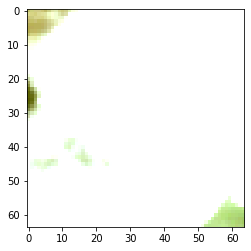

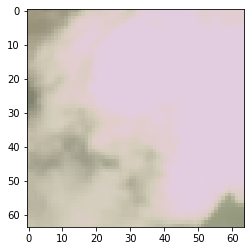

In [13]:
img, label = dataset[0]
print (Folders[label])
print ('img.shape',img.shape)
#**************************************
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'
plt.imshow(img.permute(2, 1, 0))

#**************************************
if data_transform_type == 1:
    stats = ((0.4014, 0.4324, 0.4288), (0.2662, 0.1998, 0.1473))
    def denormalize(images, means, stds):
        means = torch.tensor(means).reshape(3, 1, 1)
        stds = torch.tensor(stds).reshape(3, 1, 1)
        return images * stds + means

    def show_batch(img):
        fig, ax = plt.subplots(figsize=(4, 4))
        denorm_images = denormalize(img, *stats)
        ax.imshow(denorm_images.permute(2,1,0))
     #   ax.annotate('Denormalized Image', xy=(1, 1), xytext=(1.5, 1.5))
    show_batch(img)

## Training, Validation, & Test Datasets

While building real world machine learning models, it is quite common to split the dataset into 3 parts:

1) Training set - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.

2) Validation set - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.

3) Test set - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

In [18]:
'''                                    Randomly Split the dataset for Training,
                                       Validation, and Testing
'''


print ('The total number of dataset is: ',len(dataset))
print ('Since the dataset is much smaller for the Neural Network, therefore we have decided to train 85% of the data, 10% validation, and 5% testing.','\n')

val_size = int(len(dataset)*0.10)
test_size = int(len(dataset)*0.05)
train_size = len(dataset) - val_size - test_size

train_ds, val_ds, test_ds = random_split(dataset,[train_size, val_size, test_size])

batch_size = int(input ('Put the batch size. 20 is appropriate because my upcoming results are evaluated on 20 batch size. However, you can put any value : '))
train_dl = DataLoader(train_ds,
                      batch_size=batch_size, 
                      shuffle=True, 
                      num_workers=0)

val_dl = DataLoader(val_ds,
                    batch_size=batch_size, 
                    shuffle=True, 
                    num_workers=0) 

The total number of dataset is:  5631
Since the dataset is much smaller for the Neural Network, therefore we have decided to train 85% of the data, 10% validation, and 5% testing. 

Put the batch size. 20 is appropriate because my upcoming results are evaluated on 20 batch size. However, you can put any value : 20


['cloudy', 'desert', 'green_area', 'water']  have corresponding values 0, 1, 2, 3


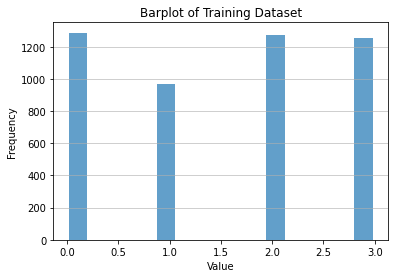

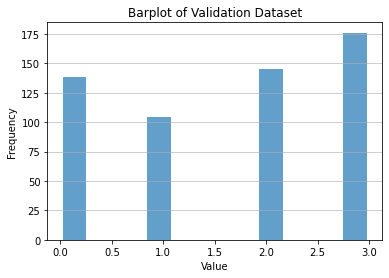

In [19]:
'''                                     Number of image data in Training and Validation set 
'''

import matplotlib.pyplot as plt

print(dataset.classes[0:4], ' have corresponding values 0, 1, 2, 3')  
def Barplot(plot_data, text):
    fig = plt.figure()
    L,I=[],[]
    for _, label in plot_data: L.append(label)
    for i in L: I+=i
    n, bins, patches = plt.hist(x=I, bins='auto',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Barplot of '+text)
    plt.show
Barplot(train_dl,'Training Dataset')
Barplot(val_dl,'Validation Dataset')
#Barplot(test_ds,'Testing Dataset')

### Visualization of first batch of data images from Training Set

In [20]:
for images, labels in train_dl:
    print ('images.shape : ',images.shape)
    break
print ('labels = ', labels)

images.shape :  torch.Size([20, 3, 64, 64])
labels =  tensor([3, 3, 1, 2, 0, 3, 3, 2, 0, 2, 3, 3, 0, 3, 0, 2, 2, 2, 3, 0])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


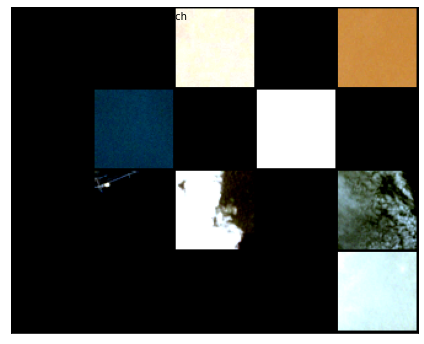

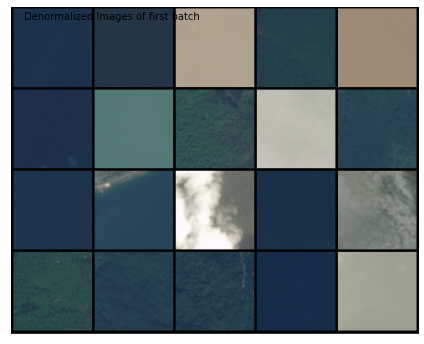

In [21]:
from torchvision.utils import make_grid
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xticks([]); ax.set_yticks([]) 
ax.imshow(make_grid(images,nrow=5).permute(1,2,0))
if data_transform_type == 1:
    ax.annotate('Normalized Images of first batch', xy=(10, 10), xytext=(10, 10))

    #plt.show()
    #******************************************************
    stats = ((0.4014, 0.4324, 0.4288), (0.2662, 0.1998, 0.1473))
    def denormalize(images, means, stds):
        means = torch.tensor(means).reshape(1, 3, 1, 1)
        stds = torch.tensor(stds).reshape(1, 3, 1, 1)
        return images * stds + means

    def show_batch(images):
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=5).permute(1, 2, 0).clamp(0,1))
        ax.annotate('Denormalized Images of first batch', xy=(10, 10), xytext=(10, 10))
    show_batch(images)
elif data_transform_type == 2:
#    continue
    ax.annotate('Images of first batch', xy=(10, 10), xytext=(10, 10))

### Analysis of Task 4

> I have transformed the images into tensor format, also I have implemented data normalization and augmentation but on your choice.

> Initially the number of images of my dataset are about 5000. Therefore, I have not ignored any images based on their number density, size or outliers.

> I have splitted the whole dataset into training (85%), validation (10%), and testing (5%) with the standard batch size 20. Although, you may take any batch size number.

> Visualization of first batch of training data shows that due to the normalization more than half of the images are extremly dark. Although, some of the features are highlighted very well after normalization especially for clouds.

# Task 5

## Approach of the Classic Machine Learning in Image classification problem

In [22]:
'''                                  I will call the dataset in same way as above
                                     Although images transform only contained Resize 
                                     and center crop.
'''
dataset_ML = torchvision.datasets.ImageFolder(root=data_dir+'/',transform=T.Compose([T.Resize(64),
                                                                                  T.CenterCrop(64)]))

'''                                  I have split the dataset randomly into Training(90%) 
                                     and Validation (10%) only.
                                     
'''
val_size = int(len(dataset)*0.10)
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset_ML,[train_size, val_size])


In [23]:
'''                                  reshape the images of the dataset to a two-dimensional array.
                                     Since the current shape of the train/validation dataset is
                                     (nsample, 64, 64, 3). Therefore 2d-array transform it into
                                     (nsample, 64*64*3)
'''

train_ds_ML, train_label_ML, val_ds_ML, val_label_ML = [],[],[],[]

def reshape_data(data_xy, x, y):
    for data, label in data_xy:
        image_array = np.array(data)/255.   # Normalized pixel values of each image with 255. So the value vary between 0-1
        x.append(image_array)
        y.append(label)
reshape_data(train_ds, train_ds_ML, train_label_ML)

train_ds_ML = np.array(train_ds_ML)
print ('Before the reshape of Training dataset : ',train_ds_ML.shape)

nsamples, nx, ny, ngb = train_ds_ML.shape
x_train2 = train_ds_ML.reshape((nsamples,nx*ny*ngb))
print ('After the reshape of Training dataset : ',x_train2.shape)

Before the reshape of Training dataset :  (5068, 64, 64, 3)
After the reshape of Training dataset :  (5068, 12288)


In [24]:
'''                                   Similarly reshape the validation dataset
'''

reshape_data(val_ds, val_ds_ML, val_label_ML)

val_ds_ML = np.array(val_ds_ML)
print ('Before the reshape of Validation dataset : ',val_ds_ML.shape)

nsamples, nx, ny, ngb = val_ds_ML.shape
x_val2 = val_ds_ML.reshape((nsamples,nx*ny*ngb))
print ('After the reshape of Validation dataset : ',x_val2.shape)

Before the reshape of Validation dataset :  (563, 64, 64, 3)
After the reshape of Validation dataset :  (563, 12288)


### Four different Machine Learning approach for Image classification

> I would like to apply LogisticRegression, Nayes Baives, Decision Tree, and Random Forest classifier to evaluate the given image classification problem.

> Finally, I will evalaute classification report in the form of accuracy, sensitivity etc of the Validation dataset and compare the results.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def machinelearning(model, xtrain, ytrain, xval, yval):
    
    '''                    Define the ML model
    '''
    model = model
    print ('Machine Learning Model : ','\n',model)
    
    '''                    Apply the given ML model on training set
    '''
    model.fit(xtrain, ytrain)   
    
    '''                    Predict the labels of the validation set
    '''
    y_pred = model.predict(xval) 
    
    '''                    Find accuracy and classification report of validation set
    '''
    Accuracy = accuracy_score(y_pred, yval) 
    Classification_report = classification_report(y_pred, yval)
    return (model, Accuracy, Classification_report)

In [26]:
DT = machinelearning(DecisionTreeClassifier(), x_train2, train_label_ML, x_val2, val_label_ML)
Model, Accuracy, _ = DT
print ('For machine learning ',Model ,', the accuracy of the validation dataset is ',round(Accuracy*100,2),'%')

Machine Learning Model :  
 DecisionTreeClassifier()
For machine learning  DecisionTreeClassifier() , the accuracy of the validation dataset is  90.59 %


In [26]:
RF = machinelearning(RandomForestClassifier(), x_train2, train_label_ML, x_val2, val_label_ML)
Model, Accuracy, _ = RF
print ('For machine learning ',Model ,', the accuracy of the validation dataset is ',round(Accuracy*100,2),'%')

Machine Learning Model :  
 RandomForestClassifier()
For machine learning  RandomForestClassifier() , the accuracy of the validation dataset is  94.49 %


In [27]:
NN = machinelearning(GaussianNB(), x_train2, train_label_ML, x_val2, val_label_ML)
Model, Accuracy, _ = NN
print ('For machine learning ',Model ,', the accuracy of the validation dataset is ',round(Accuracy*100,2),'%')

Machine Learning Model :  
 GaussianNB()
For machine learning  GaussianNB() , the accuracy of the validation dataset is  76.91 %


In [28]:
LR = machinelearning(LogisticRegression(), x_train2, train_label_ML, x_val2, val_label_ML)
Model, Accuracy, _ = LR
print ('For machine learning ',Model ,', the accuracy of the validation dataset is ',round(Accuracy*100,2),'%')

Machine Learning Model :  
 LogisticRegression()
For machine learning  LogisticRegression() , the accuracy of the validation dataset is  82.77 %


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.0, 100.0)

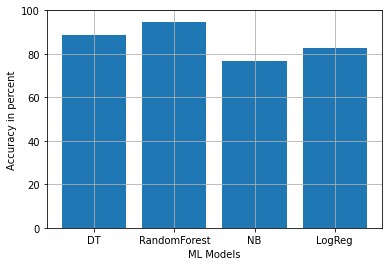

In [32]:
accuracy = [88.89,94.49,76.91,82.77]
models = ['DT','RandomForest','NB','LogReg']
plt.bar(models,accuracy)
plt.ylabel('Accuracy in percent')
plt.xlabel('ML Models')
plt.grid()
plt.ylim(0,100)

### Analysis of Machine Learning in Image classification

> In the given dataset, I have found that some of the supervised ML techniques those are Decision Tree and Random Forest classifier are also good representation of satellite image classification with more than 90% accuracies. Although, the logistic regression and Nayes baives are litte poorly perform as indicated by their accuracies.

> RandomForestClassifier has reached ~95% at the default hyperparameter (i.e., n_estimators=100). However, to increase n_estimators there is the little chance to achieved accuracy more than 97%.

> There is always a room for improvment, e.g., if we look for the accuracy more than 95% than the Deep learning algorithms outsmart machine learning with accuracy more than 97%!!!

# Task 6

## Deep Learning Experiment

      1) Brief description of DL Experiment
      
      2) Implement single convolutional layer model with 8 out_channels
      
      3) Implement our main multi-layer convolutional model with 16 out_channels
      
      4) Train & Validate the Model
      
      5) Visualization of loss per epoch & Accuracy metric on our validation dataset
      
      6) Implement our trained model into Test dataset
      
      7) Table of Hyperparameters and their results
      

### Brief description of our DL Experiment

For such dataset where we have 2-dimensional multi-channels images. The best approach is to implement 2D convolution technique in Neural Network. It is a fairly simple operation at heart: we start with a kernel, which is simply a small matrix of weights. This kernel “slides” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel.

For multi-channel (e.g. red, blue, green color) images, a different kernel is applied to each channels, and the outputs are added together pixel-wise.

There are certain advantages offered by convolutional layers when working with image data:

1) Fewer parameters: A small set of parameters (the kernel) is used to calculate outputs of the entire image, so the model has much fewer parameters compared to a fully connected layer.

2) Sparsity of connections: In each layer, each output element only depends on a small number of input elements, which makes the forward and backward passes more efficient.

3) Parameter sharing and spatial invariance: The features learned by a kernel in one part of the image can be used to detect similar pattern in a different part of another image.

We will also use a max-pooling layers to progressively decrease the height & width of the output tensors from each convolutional layer.

Before we define the entire model, let's look at how a single convolutional layer followed by a max-pooling layer operates on the data.

In [27]:
import torch.nn as nn
import torch.nn.functional as F

### Implementing Single Convolutional Layer Model:
Single Convolutional layer followed by a max-pooling layer on the single batch data.

In [28]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

image.shape :  torch.Size([20, 3, 64, 64])
out.shape :  torch.Size([20, 8, 32, 32])
label :  tensor(3)


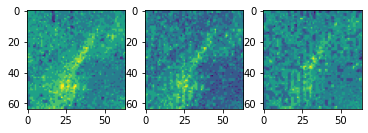

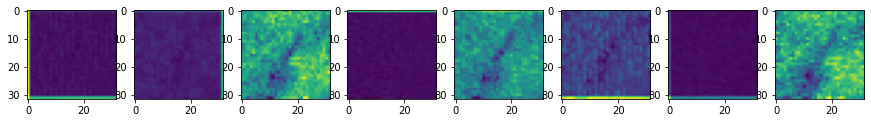

In [29]:
out = simple_model(images)
print ('image.shape : ',images.shape)
print ('out.shape : ',out.shape)
print ('label : ', labels[0])

'''                                 Following plots show the cloudy input images in 3 
                                    different channels and below panel shows the 8 channels 
                                    generated by Conv2d. Although, size of image decrease to 
                                    half due to MaxPool2d
'''


images_plot = images.detach().numpy()
out_plot = out.detach().numpy()

fig, ax = plt.subplots(1,len(images_plot[0]))

for i in range(len(images_plot[0])):
    ax[i].imshow(images_plot[0][i])
plt.show()
#***********************************************
fig, ax = plt.subplots(1,len(out_plot[0]), figsize=(15, 15))
for i in range(len(out_plot[0])):
    ax[i].imshow(out_plot[0][i])
plt.show()

> The Conv2d layer transforms a 3-channel image to a 8-channel feature map, and the MaxPool2d layer halves the height and width. 

> The feature map gets smaller as we add more layers, until we are finally left with a (nx1x1) small feature map (where n is the number of channels), which can be flattened into a vector. 

> We can then add some fully connected layers at the end to get vector of size 4 for each image

### Implement Main Convolutional Model with 16 out_channels

In [30]:
model = nn.Sequential(

    nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), # output: batch size x 16 x 32 x 32
    
    nn.Conv2d(16,16,3,1,1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), # output: batch size x 16 x 16 x 16

    nn.Conv2d(16,16,3,1,1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), # output: batch size x 16 x 8 x 8

    nn.Conv2d(16,16,3,1,1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), # output: batch size x 16 x 4 x 4
    
    nn.Conv2d(16,16,3,1,1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), # output: batch size x 16 x 2 x 2
    
    nn.Conv2d(16,16,3,1,1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), # output: batch size x 16 x 1 x 1

    # Now we flattened the image as
    nn.Flatten(), # output: batch size x 16
    nn.Linear(16,4) # output: batch size x 4  bcz of 4 out_classes originally
)

## Train & Validate our Model

We have implemented three different functions to train & validate our data,

1) loss_batch function consists of 4 inputs plus 2 optional inputs which calculate the loss for a batch of data and optionally perform gradient descent and optionally computes acurracy (metric) 

    a) Model: which is our main multi-layers convolutional model.
        
    b) loss_func: We have used Cross Entropy to calculate loss for a batch of training data
        
    c) xb: Batch input images
        
    d) yb: actual labels of corresponding inputs(xb)
        
    e) opt(optional): torch.optim.Adam
        
    d) metric(optional): calculate accuracy on validation data

2) In evaluation function, we calculates overall loss and metric for validation dataset

    a) For validation dataset, we dont need to compute gradient. Therefore we implement with torch.no_grad()

    b) Average loss|accuracy is calculated by Sum(Multiply(losses|accuracy,num))/total. Here losses|accuracy is from each data batch and num is the total images in each batch, and total represents the sum of all the images (validation dataset)  

3) The fit function records the validation loss and metric from each epoch. It returns a history of the training, useful for debugging & visualization.

In [31]:
import numpy as np

In [32]:
def loss_batch(model, loss_func, xb,yb,opt=None,metric=None): # opt and metric is None initially because we used same function to calculate loss and accuracy for validation set where we dont used gradient
    preds = model(xb)  
    loss = loss_func(preds, yb) 
    
    if opt is not None:
        '''                             computes gradient 
        '''
        loss.backward()
        '''                             update parameters 
        '''
        opt.step()
        '''                             reset gradients 
        '''
        opt.zero_grad()
    metric_result = None  
    if metric is not None:
        '''                             computes metric 
        '''
        metric_result = metric(preds,yb)
    return loss.item(),len(xb),metric_result

In [33]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    
    '''                                for validation we dont need to compute gradient
    '''
    with torch.no_grad(): 

        '''                            pass each batch through model
        '''
        results = []
        for xb, yb in valid_dl:
            
            '''                        Read the loss_batch function
            '''
            results.append(loss_batch(model, loss_fn, xb, yb, metric=metric))

        losses, nums, metrics = zip(*results) 

        '''                            total represents the total data in validation set
        '''
        total = np.sum(nums)  
        '''                            average loss across batches
        '''
        avg_loss = np.sum(np.multiply(losses,nums)) / total 
        avg_metric = None
        if metric is not None:
            '''                        average of metric across batches
            '''
            avg_metric = np.sum(np.multiply(metrics,nums)) / total 
    return avg_loss, total, avg_metric

#### Accuracy Metric: 
> Classification is more likely to seen in probablities form. Therefore we would apply Softmax fucntion to convert the output rows into probability. However, we dont need to seperately apply Softmax since it is already buildin in cross_entropy.

> we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using torch.max, which returns each row's largest element and the corresponding index.

> Finally, we are summing all the Trues (prediction = actual label) divided by the batch_size, which gives us the accuracy

In [34]:
'''                             Function to calculate accuracy of validation set
'''
def accuracy(outputs, labels):
   # probs = F.softmax(outputs, dim=1)
    _, preds = torch.max(outputs, dim=1)  #outputs
    return (torch.sum(preds == labels).item()) / len(preds)  

In [35]:
def fit(epochs, model, loss_fn, train_dl, valid_dl, opt_fn=None, lr=None, metric=None):

    train_losses, val_losses, val_metrics = [],[],[]
    if opt_fn is None: opt_fn = optimizer #torch.optim.Adam#torch.optim.SGD
    opt = opt_fn(model.parameters(), lr=lr)
    for epoch in range(epochs):

        '''              Training
        '''
        model.train()
        for xb, yb in train_dl:
            train_loss,_,_ = loss_batch(model, loss_fn, xb, yb,opt)

        '''              Evaluation
        '''
        model.eval()
        result = evaluate(model,loss_fn,valid_dl,metric)  
        val_loss,total,val_metric = result
        
        '''              Record the loss & accuracy
        '''
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_metrics.append(val_metric)

        '''              print progress
        '''
        if metric is None:
            print ('Epoch [{},{}], Loss: {:.4f}'
                  .format(epoch+1, epochs,val_loss))
        else:
            print ('Epoch [{},{}], Loss: {:.4f}, {}: {:.4f}'
                   .format(epoch+1,epochs,val_loss,metric.__name__,val_metric))   
    return train_losses, val_losses, val_metrics

In [36]:
num_epochs = int(input('Number of Epochs: More preferably 10, although you can put any number : '))
optimizer = int(input('Optimizer: write 1 for Adam and 2 for SGD : '))
lr = float(input('Learning Rate : More preferably 0.001, alhtough you can put any value : '))
if optimizer == 1:
    optimizer = torch.optim.Adam
elif optimizer == 2:
    optimizer = torch.optim.SGD
   
num_epochs = num_epochs
opt_fn = optimizer
lr = lr #0.0005#0.005

Number of Epochs: More preferably 10, although you can put any number : 20
Optimizer: write 1 for Adam and 2 for SGD : 1
Learning Rate : More preferably 0.001, alhtough you can put any value : 0.001


In [37]:
history = fit(num_epochs, model, F.cross_entropy,
                 train_dl, val_dl, opt_fn, lr, accuracy)   #train_dl, val_dl
train_losses, val_losses, val_metrics = history

Epoch [1,20], Loss: 0.5063, accuracy: 0.7052
Epoch [2,20], Loss: 0.4171, accuracy: 0.7975
Epoch [3,20], Loss: 0.3057, accuracy: 0.8934
Epoch [4,20], Loss: 0.5870, accuracy: 0.7780
Epoch [5,20], Loss: 0.2206, accuracy: 0.9130
Epoch [6,20], Loss: 0.1932, accuracy: 0.9290
Epoch [7,20], Loss: 0.2196, accuracy: 0.9005
Epoch [8,20], Loss: 0.2072, accuracy: 0.9290
Epoch [9,20], Loss: 0.2225, accuracy: 0.9183
Epoch [10,20], Loss: 0.1626, accuracy: 0.9343
Epoch [11,20], Loss: 0.2470, accuracy: 0.9130
Epoch [12,20], Loss: 0.1643, accuracy: 0.9290
Epoch [13,20], Loss: 0.1903, accuracy: 0.9218
Epoch [14,20], Loss: 0.1435, accuracy: 0.9414
Epoch [15,20], Loss: 0.1617, accuracy: 0.9378
Epoch [16,20], Loss: 0.2406, accuracy: 0.9094
Epoch [17,20], Loss: 0.1900, accuracy: 0.9130
Epoch [18,20], Loss: 0.1553, accuracy: 0.9432
Epoch [19,20], Loss: 0.1556, accuracy: 0.9325
Epoch [20,20], Loss: 0.1876, accuracy: 0.9325


### Visualization of loss per epoch & Accuracy metric

1) I have only visualized one test with parameters,
           
       a) Data Normalization --> Yes
       b) Batch Size --> 20
       c) Optimizer --> Adam
       d) Learning rate --> 0.001

Text(0, 0.5, 'Validation set Accuracy [%]')

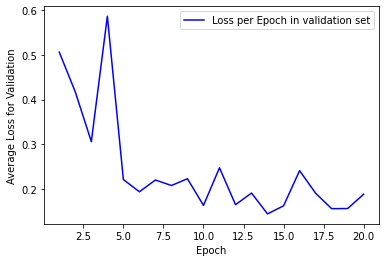

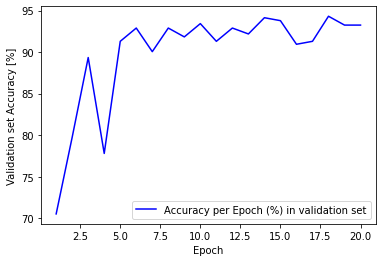

In [39]:
import matplotlib.pyplot as plt
#print (val_metrics)
E = np.linspace(1,num_epochs,num_epochs)

plt.figure()
plt.plot(E,val_losses,'b-',label='Loss per Epoch in validation set')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Loss for Validation')
#plt.ylim(0,0.2)
#plt.savefig('pic25_4june.png')
plt.figure()
plt.plot(E,np.array(val_metrics)*100,'b-',label='Accuracy per Epoch (%) in validation set')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation set Accuracy [%]')
#plt.show()
#plt.savefig('pic26_4june.png')
#***********************************************************************************


### Implement trained DL model into test dataset

I will upload the trained DL model (consists of trained weights and biases) with maximum validation accuracy 97.87% and apply it on test dataset.

In [40]:
##torch.save(model.state_dict(), 'DL_2.pth')
'''                     Upload already trained Model
'''

modelB = model
modelB.load_state_dict(torch.load('DL_2.pth'), strict=False)  # DL_2.pth

<All keys matched successfully>

In [41]:
modelB.state_dict()

OrderedDict([('0.weight',
              tensor([[[[-0.0654, -0.1123, -0.2012],
                        [-0.0836,  0.0796,  0.1060],
                        [-0.0742, -0.1559, -0.0606]],
              
                       [[ 0.1951, -0.0895, -0.0567],
                        [ 0.0242,  0.2919,  0.2233],
                        [ 0.2135,  0.0112, -0.0048]],
              
                       [[ 0.1621, -0.1400, -0.1830],
                        [ 0.1112,  0.1017, -0.1445],
                        [ 0.0751,  0.1009, -0.1455]]],
              
              
                      [[[-0.0860,  0.0725,  0.0640],
                        [ 0.2739,  0.0740,  0.2631],
                        [ 0.0947, -0.0068,  0.1865]],
              
                       [[ 0.1501, -0.0203,  0.1835],
                        [ 0.1318,  0.1251,  0.0976],
                        [ 0.0985,  0.0964, -0.2166]],
              
                       [[ 0.0127, -0.0060, -0.0340],
                        [ 0.12

Shape: torch.Size([3, 64, 64])
Label: water


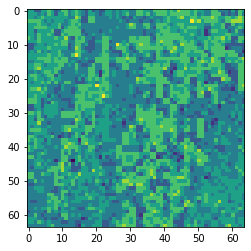

In [42]:
'''                              Calling the first image from test Dataset
'''
img, label = test_ds[0]

plt.imshow(img[0])
print('Shape:', img.shape)
print('Label:', Folders[label])

In [43]:
'''                        convert above image into batch as..
'''
print (img.unsqueeze(0).shape)

torch.Size([1, 3, 64, 64])


define helper function (predict_image) which return the predicted label for a single image tensor

In [44]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _,preds = torch.max(yb,dim=1)
    test_prediction = preds[0].item()
    return Folders[test_prediction]

Label: water , Predicted: water


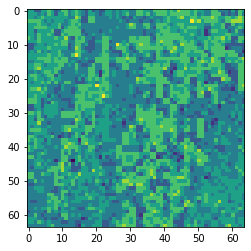

In [45]:
img, label = test_ds[0]
plt.imshow(img[0])
print('Label:', Folders[label], ', Predicted:', predict_image(img, modelB))

Label: green_area , Predicted: green_area


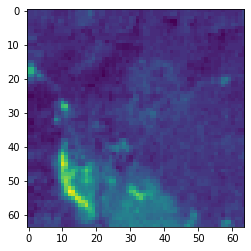

In [46]:
img, label = test_ds[100]
plt.imshow(img[0])
print('Label:', Folders[label], ', Predicted:', predict_image(img, modelB))

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [47]:
test_loader = DataLoader(test_ds, batch_size=batch_size)
result = evaluate(modelB,F.cross_entropy,test_loader,metric=accuracy)
test_loss,_,test_accuracy = result
print ('Average loss in test dataset = ',round(test_loss,3), '\n',
      'Average accuracy in test dataset [%]= ', round(test_accuracy*100, 3) )

Average loss in test dataset =  0.036 
 Average accuracy in test dataset [%]=  99.288


### Table of Hyperparameters & their results

In [48]:
import pandas as pd

def create_dataframe():
    table = {'Data_Normalized' : ["No","No","Yes","Yes","No","Yes","No","Yes"],
             'Batch_Size': [20,20,20,20,20,20,20,20],
             'Optimizer': ['SGD','SGD','SGD','SGD','Adam','Adam','Adam','Adam'],
             'Learning_rate': [0.001, 0.01,0.001, 0.01,0.001,0.001,0.001,0.001],
             'Total_Epochs' : [10,10,10,10,10,10,50,50],
             'Validation_loss' : [1.3834, 1.2292, 1.3766, 0.9618, 0.2868, 0.1773,0.1512,0.0669],
             'Validation_accuracy_percent' : [25.22, 39.25, 22.56, 50.44, 88.81, 94.14,95.38,97.87],
             'Test_loss' : [1.386, 1.196, 1.3771, 0.9542, 0.2813, 0.2071,0.1689,0.0632],
             'Test_accuracy_percent' : [24.55, 41.63, 25.978, 49.82, 89.67, 93.59,94.30,97.15] 
            }

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(table,index=['Test 1','Test 2','Test 3','Test 4','Test 5','Test 6','Test 7','Test 8'])
    return df
df = create_dataframe()
df

,Data_Normalized,Batch_Size,Optimizer,Learning_rate,Total_Epochs,Validation_loss,Validation_accuracy_percent,Test_loss,Test_accuracy_percent
Test 1,No,20,SGD,0.001,10,1.3834,25.22,1.3860,24.550
Test 2,No,20,SGD,0.010,10,1.2292,39.25,1.1960,41.630
Test 3,Yes,20,SGD,0.001,10,1.3766,22.56,1.3771,25.978
Test 4,Yes,20,SGD,0.010,10,0.9618,50.44,0.9542,49.820
Test 5,No,20,Adam,0.001,10,0.2868,88.81,0.2813,89.670
Test 6,Yes,20,Adam,0.001,10,0.1773,94.14,0.2071,93.590
Test 7,No,20,Adam,0.001,50,0.1512,95.38,0.1689,94.300
Test 8,Yes,20,Adam,0.001,50,0.0669,97.87,0.0632,97.150


### Analysis of the variation in Hyperparameters

> I have tested my DL model by varying 4 parameters those are Data_normalization, Optimizer, Learning_rate, Total_Epochs. Although, for more testing we can also vary Batch_size.

> Test 1-2: If we only vary the learning rate under the condition that Optimizer is SGD (Stochastic gradient descent) and rest of the parameters remain same. I have found that increasing the learning rate from 0.001 to 0.01 increase the test data accuracy from 24% to 41%.

> Test 3-4: I have applied data normalization and learning rate with other parameters remain constant and found that data normalization increased the test accuracy from about 1% to 9% depends on the learning rate value.

> Test 5-6: Here I have changed optimizer and data normalization only, this evaluation showed that optimizer Adam is more powerful in the way that it adjust and varies the leanring rate itself to approach minimum value of loss in dataset. Also the normalization plays an extra important role to decrease the loss and increase accuracy.

> Test 7-8: In final two tests, I have increased the total epoch numbers from 10 to 50 and other parameters are same as Test 5-6 respectively. These tests are important to see the impact of increasing the epoch numbers that eventually increased the accuracy of the model.

# Task 7

## Conclusion & Future Work

    1) I have implemented the Satellite images on the Multi-layer Convolutional Neural Network Model for the purpose of Image classification (cloudy, desert, water, and green_area).
    
    2) I have 5631 total images those are in equal quantity for each class except desert with 1131 images. These image dataset are split into training (85%), validation (10%), and testing (5%) dataset.
    
    3) First I have tried to implement different standard Machine Learning techniques to evaluate the image classification problem. Here I found that RandomForestClassifier is nevertheless giving 95% accuracy with less computational time. Although, if we try to improved more accuracy than it would be harder for ML therefore Neural Network play important role to acheived accuracy upto 97%.
    
    4) My DL experiment consists of multi-layer convolutional model with 16 out_channels (named=model), Train & validate the model using functions (named = loss_batch, evaluate, fit) and finally applied the trained model (DL_2.pth) into test dateset

    5) I have found that the following hyperparameters are strongly impact and increased the accuracy of DL model upto 97%;
            a) Data Normalization and augmentation 
            b) Adam Optimizer
            c) Suitable small learning rate (0.001)
            d) smaller batch size (20)
            
    6) This project would helpful for the remote sensing departments where they have to deal with the tremendous amount of satellite images and label all of them according to their features. This DL model would play important role to distinguish different Earth features with the accuracy of 97%.
    
    7) In the future work, the given model can be improved by implementing the further techniques like Residual connection or Batch normalization.